In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
%matplotlib inline

In [527]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [528]:
init_notebook_mode(connected=True)

In [529]:
cf.go_offline()

In [530]:
rates = pd.read_csv('suicide.csv')
rates.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [531]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [532]:
rates.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [533]:
#check for duplicate data
print(rates.duplicated().any())

False


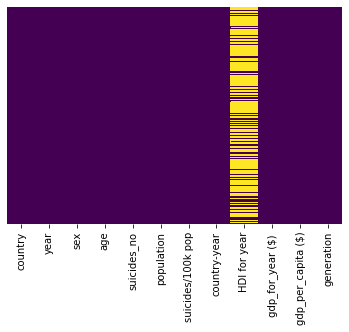

In [534]:
#check for null data
sns.heatmap(rates.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [535]:
# drop HDI for year column due to null values, drop unnecessary column - country-year 
rates = rates.drop(['HDI for year', 'country-year'], axis=1)

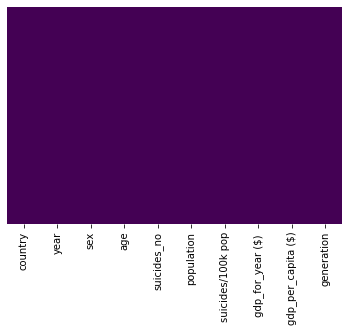

In [536]:
#Check for null values
sns.heatmap(rates.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [537]:
#remove whitespace
rates.columns = rates.columns.str.replace(' ','')

In [538]:
rates.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100kpop gdp_for_year($)  gdp_per_capita($)       generation  
0              6.71   2,156,624,900                796     Generation X  
1              5.19   2,156,624,900                796           Silent  
2              4.83   2,156,624,900                796     Generation X  
3              4.59   2,156,624,900                796  G.I. Generation  
4              3.28   2,156,624,900                796          Boomers

### Exploration

In [539]:
#Filter the top 30 countries with the highest suicide rates
top_30 = rates.groupby(['country']).count().nlargest(30,'suicides_no').reset_index()
top_30

country  year  sex  age  suicides_no  population  \
0             Austria   382  382  382          382         382   
1             Iceland   382  382  382          382         382   
2           Mauritius   382  382  382          382         382   
3         Netherlands   382  382  382          382         382   
4           Argentina   372  372  372          372         372   
5             Belgium   372  372  372          372         372   
6              Brazil   372  372  372          372         372   
7               Chile   372  372  372          372         372   
8            Colombia   372  372  372          372         372   
9             Ecuador   372  372  372          372         372   
10             Greece   372  372  372          372         372   
11             Israel   372  372  372          372         372   
12              Italy   372  372  372          372         372   
13              Japan   372  372  372          372         372   
14         Luxembourg   372  372  372          372         372   
15              Malta   372  372  372          372         372   
16             Mexico   372  372  372          372         372   
17        Puerto Rico   372  372  372          372         372   
18  Republic of Korea   372  372  372          372         372   
19          Singapore   372  372  372          372         372   
20              Spain   372  372  372          372         372   
21     United Kingdom   372  372  372          372         372   
22      United States   372  372  372          372         372   
23          Australia   360  360  360          360         360   
24           Bulgaria   360  360  360          360         360   
25         Costa Rica   360  360  360          360         360   
26             France   360  360  360          360         360   
27          Guatemala   360  360  360          360         360   
28            Ireland   360  360  360          360         360   
29             Norway   360  360  360          360         360   

    suicides/100kpop  gdp_for_year($)  gdp_per_capita($)  generation  
0                382              382                382         382  
1                382              382                382         382  
2                382              382                382         382  
3                382              382                382         382  
4                372              372                372         372  
5                372              372                372         372  
6                372              372                372         372  
7                372              372                372         372  
8                372              372                372         372  
9                372              372                372         372  
10               372              372                372         372  
11               372              372                372         372  
12               372              372                372         372  
13               372              372                372         372  
14               372              372                372         372  
15               372              372                372         372  
16               372              372                372         372  
17               372              372                372         372  
18               372              372                372         372  
19               372              372                372         372  
20               372              372                372         372  
21               372              372                372         372  
22               372              372                372         372  
23               360              360                360         360  
24               360              360                360         360  
25               360              360                360         360  
26               360              360             

In [540]:
fig = px.bar(top_30, x='suicides_no', y='country', color='suicides_no', color_continuous_scale=["blue", "green", "red"])

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

fig.show()

In [541]:
#Filter out the lowest 30 countries with the least suicide rates
bottom_30 = rates.groupby(['country']).count().nsmallest(30, 'suicides_no').reset_index()
bottom_30

country  year  sex  age  suicides_no  population  \
0                 Mongolia    10   10   10           10          10   
1               Cabo Verde    12   12   12           12          12   
2                 Dominica    12   12   12           12          12   
3                    Macau    12   12   12           12          12   
4   Bosnia and Herzegovina    24   24   24           24          24   
5                     Oman    36   36   36           36          36   
6    Saint Kitts and Nevis    36   36   36           36          36   
7               San Marino    36   36   36           36          36   
8                Nicaragua    72   72   72           72          72   
9     United Arab Emirates    72   72   72           72          72   
10                  Turkey    84   84   84           84          84   
11                Maldives   120  120  120          120         120   
12              Montenegro   120  120  120          120         120   
13                    Fiji   132  132  132          132         132   
14                Kiribati   132  132  132          132         132   
15               Sri Lanka   132  132  132          132         132   
16                   Aruba   168  168  168          168         168   
17                  Cyprus   178  178  178          178         178   
18                   Qatar   178  178  178          178         178   
19             Philippines   180  180  180          180         180   
20              Azerbaijan   192  192  192          192         192   
21                 Jamaica   204  204  204          204         204   
22                  Serbia   216  216  216          216         216   
23              Seychelles   216  216  216          216         216   
24            South Africa   240  240  240          240         240   
25                 Bahrain   252  252  252          252         252   
26                 Belarus   252  252  252          252         252   
27                 Estonia   252  252  252          252         252   
28                  Latvia   252  252  252          252         252   
29                Slovenia   252  252  252          252         252   

    suicides/100kpop  gdp_for_year($)  gdp_per_capita($)  generation  
0                 10               10                 10          10  
1                 12               12                 12          12  
2                 12               12                 12          12  
3                 12               12                 12          12  
4                 24               24                 24          24  
5                 36               36                 36          36  
6                 36               36                 36          36  
7                 36               36                 36          36  
8                 72               72                 72          72  
9                 72               72                 72          72  
10                84               84                 84          84  
11               120              120                120         120  
12               120              120                120         120  
13               132              132                132         132  
14               132              132                132         132  
15               132              132                132         132  
16               168              168                168         168  
17               178              178                178         178  
18               178              178                178         178  
19               180              180                180         180  
20               192              192                192         192  
21               204              204                204         204  
22               216              216                216         216  
23               216              216                216         216  
24               240              240     

In [542]:
fig = px.bar(bottom_30, x='suicides_no', y='country', color='suicides_no', color_continuous_scale =['blue', 'green', 'red'])

fig.update_layout(
    autosize=False,
    width = 800,
    height = 800)

fig.show()

In [543]:
#Show the total number of suicides over the years
year = rates.groupby(['year']).count().reset_index()
fig = px.histogram(year, x='year', y='suicides_no', nbins=35)
fig.update_layout(bargap=0.1)
fig.show()

Why to the rates drop so significantly in 2015? Innaccurate data?

In [544]:
sex = rates.groupby(['sex']).count().reset_index()
fig=px.bar(sex, x='sex', y='suicides_no')
fig.show()

In [545]:
age = rates.groupby(['age']).count().reset_index()
fig=px.bar(age, x='age', y='suicides_no', category_orders={"age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]})
fig.show()



In [546]:
pop = rates.groupby(['population']).count().reset_index()
fig = px.histogram(pop, x='population', y='suicides_no', nbins=2000)
fig.update_layout(xaxis_range=[0,2000000], bargap=0.1)
fig.show()

In [547]:
per_100K = rates.groupby(['suicides/100kpop']).count().reset_index()
fig = px.histogram(per_100K, x='suicides/100kpop', y='suicides_no')
fig.update_layout(xaxis_range=[0,100], bargap=0.1)
fig.show()

In [548]:
gdp = rates.groupby(['gdp_for_year($)']).count().reset_index()
fig = px.histogram(gdp, x='gdp_for_year($)', y='suicides_no')
fig.update_layout(xaxis_range=[0,4000000000000], bargap=0.1)
fig.show()

In [549]:
gdp_capita = rates.groupby(['gdp_per_capita($)']).count().reset_index()
fig = px.histogram(gdp_capita, x='gdp_per_capita($)', y='suicides_no')
fig.update_layout(xaxis_range=[0,80000], bargap=0.1)
fig.show()

In [550]:
gen = rates.groupby(['generation']).count().reset_index()
fig=px.bar(gen, x='generation', y='suicides_no', category_orders={"generation": ["Generation Z", "Millenials", "Generation X", "Boomers", "Silent", "G.I. Generation"]})
fig.show()

I would like more information about how gender, gdp per capita, and generation effect suicide rate per 100K for the all countries.

In [560]:
fig = px.box(rates, x='generation', y='suicides/100kpop', color='sex', category_orders={"generation": ["Generation Z", "Millenials", "Generation X", "Boomers", "Silent", "G.I. Generation"]})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [559]:
fig = px.histogram(rates, x='gdp_per_capita($)', y='suicides/100kpop', color='sex')
fig.update_layout(xaxis_range=[0,60000], bargap=0.1)
fig.show()